In [ ]:
# 공용 소스코드 종합을 위한 개별 작성파일입니다.
# 해당파일에 공유할 코드를 작성해주시고, 수정시에는 꼭 해당양식을 맞춰서 해주세요.
# 작성코드에 세부적으로 주석을 달아주시면 감사드리겠습니다.
# 수정시에는 수정한 코드부분에 수정일시 및 수정내용을 작성해주세요.
# 공용 소스코드에 반영 후에는 반영완료로 제가 따로 수정해서 반영해드리겠습니다.
print('만나서 반갑습니다. 함께 힘을 모아 프로젝트 마무리까지 같이 잘해봅시다!') # 2021.09.29 16:35부 (수정) / 수정내용 : print문 추가

만나서 반갑습니다. 함께 힘을 모아 프로젝트 마무리까지 같이 잘해봅시다!


In [2]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df1 = pd.read_csv("/content/T20_2019_1백만.1.csv", encoding = "euc-kr")
df2 = pd.read_csv("/content/T20_2019_1백만.2.csv", encoding = "euc-kr")
df3 = pd.read_csv("/content/T20_2019_1백만.3.csv", encoding = "euc-kr")

In [ ]:
df = pd.concat([df1,df2,df3])
df.tail()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
3322111,2019,952268,108889976,2,13,48,20190808,3,12,H104,H019,1.0,1.0,0.15,18470.0,5500.0,12970.0,1.0,20201222.0
3322112,2019,952268,100471815,2,13,48,20190221,3,1,I109,E780,1.0,1.0,0.15,20650.0,6100.0,14550.0,60.0,20201222.0
3322113,2019,952268,105954617,2,13,48,20191203,3,1,J060,J310,1.0,1.0,0.15,15690.0,4700.0,10990.0,4.0,20201222.0
3322114,2019,952268,105989270,2,13,48,20191207,3,1,J310,J304,1.0,1.0,0.15,13660.0,4000.0,9660.0,5.0,20201222.0
3322115,2019,952268,106021623,2,13,48,20191202,3,1,J22,J303,1.0,1.0,0.15,11210.0,3300.0,7910.0,3.0,20.0


In [ ]:
del df1, df2, df3

## df에 입원 여부 컬럼 추가 (입원 = 1 입원X = 0 로 바꾸기)

In [ ]:
df['입원여부'] = df['서식코드'].apply(lambda x: 1 if x==2 else 0)
df.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,입원여부
0,2019,1,104243474,2,12,46,20191104,3,5,M751,M750,1.0,1.0,0.25,19240.0,9600.0,9640.0,0.0,20201222.0,0
1,2019,1,107479370,2,12,46,20190806,3,1,E1164,N308,1.0,1.0,0.25,145680.0,72800.0,72880.0,0.0,20201222.0,0
2,2019,1,106881883,2,12,46,20190920,3,1,N308,E1164,1.0,1.0,0.25,13240.0,6600.0,6640.0,3.0,20201222.0,0
3,2019,1,109043837,2,12,46,20190807,2,1,E1164,N308,7.0,21.0,0.25,861590.0,205810.0,655780.0,0.0,20201222.0,1
4,2019,1,103174392,2,12,46,20190318,3,13,H6531,J303,1.0,1.0,0.15,48440.0,14500.0,33940.0,3.0,20201222.0,0


## 0. 데이터 전처리

In [ ]:
df['연령대'] = df['연령대코드'].apply(lambda x: ((x-1)//2)*10)
df.tail()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,입원여부,연령대
3322111,2019,952268,108889976,2,13,48,20190808,3,12,H104,H019,1.0,1.0,0.15,18470.0,5500.0,12970.0,1.0,20201222.0,0,60
3322112,2019,952268,100471815,2,13,48,20190221,3,1,I109,E780,1.0,1.0,0.15,20650.0,6100.0,14550.0,60.0,20201222.0,0,60
3322113,2019,952268,105954617,2,13,48,20191203,3,1,J060,J310,1.0,1.0,0.15,15690.0,4700.0,10990.0,4.0,20201222.0,0,60
3322114,2019,952268,105989270,2,13,48,20191207,3,1,J310,J304,1.0,1.0,0.15,13660.0,4000.0,9660.0,5.0,20201222.0,0,60
3322115,2019,952268,106021623,2,13,48,20191202,3,1,J22,J303,1.0,1.0,0.15,11210.0,3300.0,7910.0,3.0,20.0,0,60


## 1. 입원비율

In [ ]:
#### 1-1. 입원 비율 (모든 방문 횟수에 대해서)
df['입원여부'].mean()

0.02154682416145161

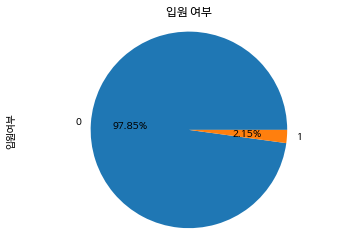

In [ ]:
df_temp = df['입원여부'].value_counts()
df_temp.plot.pie(autopct='%.2f%%')
plt.title('입원 여부')
plt.axis('equal')
plt.show()

## 2. 연령별 입원 비율


In [ ]:
df_0 = df.groupby(['연령대']).count()
df_0

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,입원여부
연령대,,,,,,,,,,,,,,,,,,,,
0,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960,1251960
10,534735,534735,534735,534735,534735,534735,534735,534735,534735,534735,534735,534734,534734,534734,534734,534734,534734,534734,534734,534735
20,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748,618748
30,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375,870375
40,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172,1125172
50,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301,1596301
60,1782238,1782238,1782238,1782238,1782238,1782238,1782238,1782238,1782238,1782237,1782237,1782237,1782237,1782237,1782237,1782237,1782237,1782237,1782237,1782238
70,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797,1485797
80,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000,740000


In [ ]:
df_1 = df.groupby(['연령대', '입원여부']).count()
df_1

기준년도  가입자 일련번호  진료내역일련번호  ...  심결보험자부담금    총처방일수  데이터 기준일자
연령대 입원여부                               ...                             
0   0     1232312   1232312   1232312  ...   1232312  1232312   1232312
    1       19648     19648     19648  ...     19648    19648     19648
10  0      528958    528958    528958  ...    528957   528957    528957
    1        5777      5777      5777  ...      5777     5777      5777
20  0      608898    608898    608898  ...    608898   608898    608898
    1        9850      9850      9850  ...      9850     9850      9850
30  0      854615    854615    854615  ...    854615   854615    854615
    1       15760     15760     15760  ...     15760    15760     15760
40  0     1106750   1106750   1106750  ...   1106750  1106750   1106750
    1       18422     18422     18422  ...     18422    18422     18422
50  0     1564913   1564913   1564913  ...   1564913  1564913   1564913
    1       31388     31388     31388  ...     31388    31388     31388
60  0     1745886   1745886   1745886  ...   1745885  1745885   1745885
    1       36352     36352     36352  ...     36352    36352     36352
70  0     1450707   1450707   1450707  ...   1450707  1450707   1450707
    1       35090     35090     35090  ...     35090    35090     35090
80  0      696704    696704    696704  ...    696704   696704    696704
    1       43296     43296     43296  ...     43296    43296     43296

[18 rows x 19 columns]

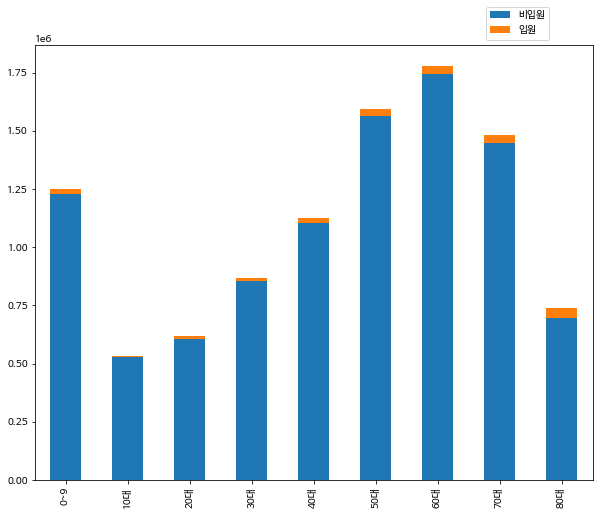

In [ ]:
age = ['0~9','10대','20대','30대','40대','50대','60대','70대','80대']
data={
    '비입원' : [1230624, 528143, 608161, 853802, 1105645, 1564150, 1743195, 1449059, 695962],
    '입원' : [19643, 5762, 9845, 15738, 18390, 31328, 36297, 35026, 43195]
}
df=pd.DataFrame(data,index=age)

df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

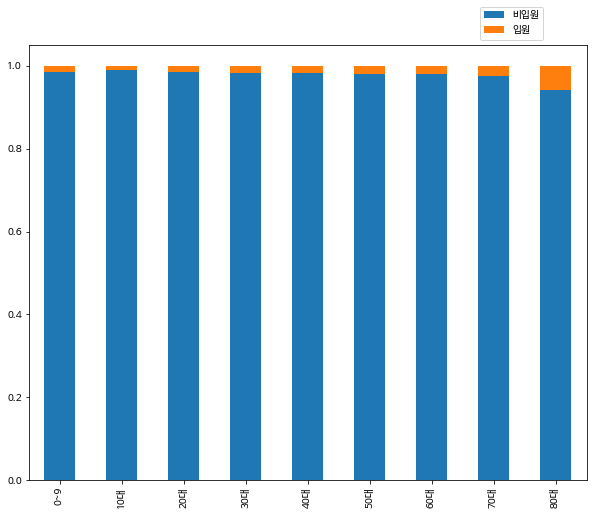

In [ ]:
age = ['0~9','10대','20대','30대','40대','50대','60대','70대','80대']
data={
    '비입원' : [1230624/1250267, 528143/533905, 608161/618006, 853802/869540,\
             1105645/1124035, 1564150/1595478, 1743195/1779492, 1449059/1484085, 695962/739157],
    '입원' : [19643/1250267, 5762/533905, 9845/618006, 15738/869540,\
            18390/1124035, 31328/1595478, 36297/1779492, 35026/1484085, 43195/739157]
}
df=pd.DataFrame(data,index=age)

df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

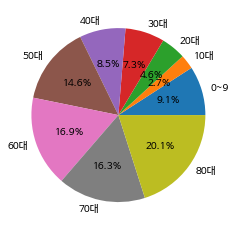

In [ ]:
# 연령별 입원환자 비율
ratio = [19643, 5762, 9845, 15738, 18390, 31328, 36297, 35026, 43195]
labels = ['0~9','10대','20대','30대','40대','50대','60대','70대','80대']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [ ]:
## 진료 횟수별로
df_age1 = df['연령대'].value_counts().sort_index()
df_age1

0.0     21400
10.0     9084
20.0    10957
30.0    14791
40.0    18940
50.0    27019
60.0    31177
70.0    25194
80.0    13488
Name: 연령대, dtype: int64

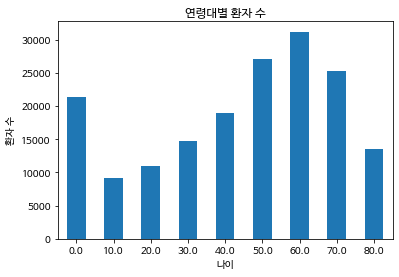

In [ ]:
df_age1.plot(kind='bar', rot=0)
plt.title("연령대별 환자 수")
plt.xlabel("나이")
plt.ylabel("환자 수")
plt.show()

## 3. 시도별 환자 수

In [ ]:
df_sido1 = df['시도코드'].value_counts()
df_sido1

41.0    40662
11.0    30010
26.0    12062
48.0    11401
28.0     9478
27.0     9144
47.0     8975
44.0     7991
45.0     7472
46.0     7013
43.0     5849
30.0     5307
42.0     4761
29.0     4498
31.0     3951
49.0     2630
36.0      846
Name: 시도코드, dtype: int64

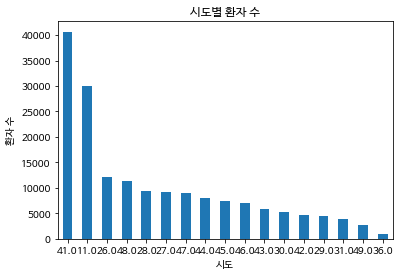

In [ ]:
# 시도별 환자수 (중복 제거X)
df_sido1.plot(kind='bar', rot=0)
plt.title("시도별 환자 수")
plt.xlabel("시도")
plt.ylabel("환자 수")
plt.show()

In [ ]:
df_sido = df_merge['시도코드'].value_counts()
df_sido

41.0    3416
11.0    2492
26.0     857
48.0     840
28.0     753
47.0     647
27.0     615
44.0     565
46.0     472
45.0     465
43.0     436
42.0     400
30.0     384
29.0     364
31.0     343
49.0     177
36.0      81
Name: 시도코드, dtype: int64

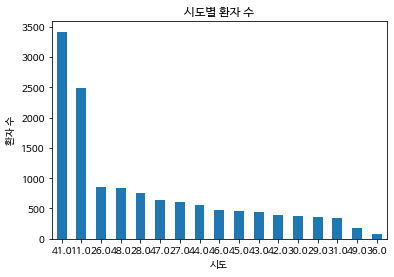

In [ ]:
# 시도별 환자수 (중복 제거)
df_sido.plot(kind='bar', rot=0)
plt.title("시도별 환자 수")
plt.xlabel("시도")
plt.ylabel("환자 수")
plt.show()

## 4. 진료과목별 입원 비율

In [ ]:
df_subject = df[['진료과목코드']].value_counts()
df_subject

진료과목코드
1.0       57092
5.0       28695
13.0      18582
12.0      11325
11.0       9870
14.0       8031
10.0       5099
4.0        5070
23.0       4677
6.0        4220
3.0        4085
15.0       3797
2.0        3181
9.0        2835
21.0       1853
24.0       1624
0.0         938
7.0         377
16.0        290
8.0         188
17.0        122
22.0         35
20.0         34
25.0         24
19.0          6
dtype: int64

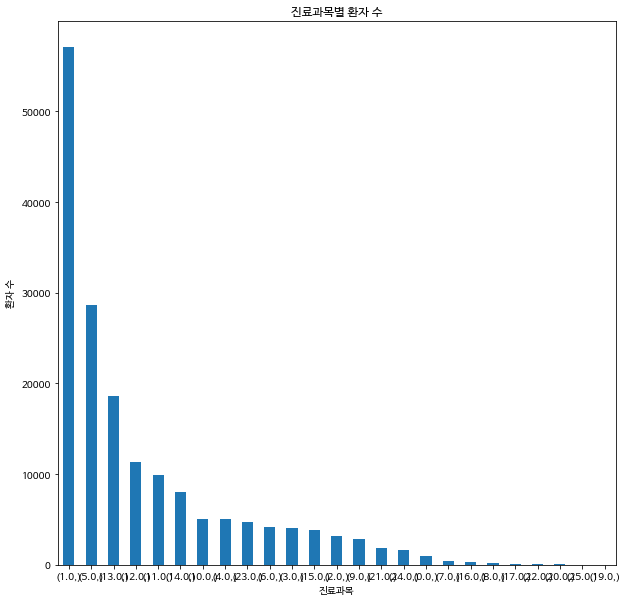

In [ ]:
# 시도별 환자수 (중복 제거X)
df_subject.plot(kind='bar', rot=0, figsize=(10,10))
plt.title("진료과목별 환자 수")
plt.xlabel("진료과목")
plt.ylabel("환자 수")
plt.show()

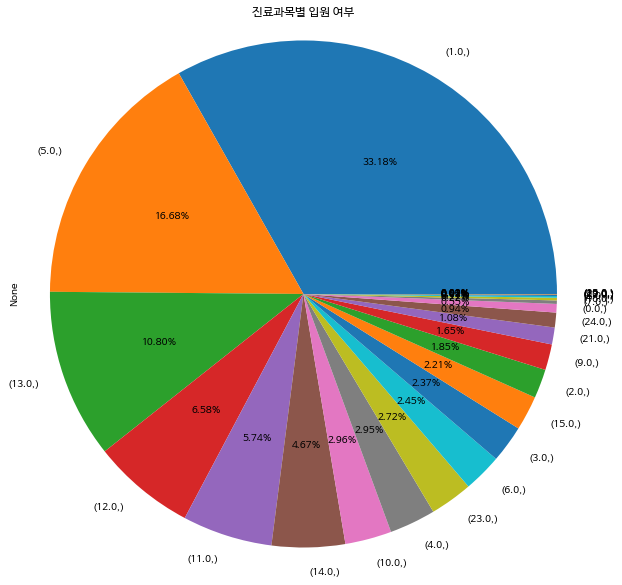

In [ ]:
df_subject.plot.pie(autopct='%.2f%%', figsize=(10,10))
plt.title('진료과목별 입원 여부')
plt.axis('equal')
plt.show()

# 모델링

## 카이분포

In [54]:
df_train = pd.read_csv("/content/모델제작용데이터셋(헬스케어).csv", encoding = "utf-8")

In [55]:
df_train.tail()

,성별코드,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,부상병코드,심결가산율
13178340,2,1,47,0,21,15,15,4
13178341,2,1,47,0,11,9,9,2
13178342,2,1,47,0,12,7,15,3
13178343,2,1,47,1,11,15,15,3
13178344,2,1,47,0,13,9,9,1


In [56]:
for i in df_train.columns:
    df_train[i] = df_train[i].astype('category')

In [ ]:
CrosstabResult=pd.crosstab(index=df_train['서식코드'],columns=df_train['성별코드'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

성별코드        1        2
서식코드                  
0     5621397  7272986
1      125928   158034
The P-Value of the ChiSq Test is: 1.4459695826147777e-15


In [ ]:
CrosstabResult=pd.crosstab(index=df_train['서식코드'],columns=df_train['연령대코드'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

연령대코드       1       2       3       4  ...      15      16      17      18
서식코드                                   ...                                
0      956751  667681  357583  339827  ...  997223  911800  602036  313809
1       18769    6829    3418    4293  ...   20993   25715   26340   30264

[2 rows x 18 columns]
The P-Value of the ChiSq Test is: 0.0


In [ ]:
CrosstabResult=pd.crosstab(index=df_train['서식코드'],columns=df_train['시도코드'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

시도코드       11      26      27      28  ...      46      47      48      49
서식코드                                   ...                                
0     2329846  881869  615444  704026  ...  538542  690849  839227  175735
1       39890   22879   11591   15592  ...   18956   17174   24848    3520

[2 rows x 17 columns]
The P-Value of the ChiSq Test is: 0.0


In [ ]:
CrosstabResult=pd.crosstab(index=df_train['서식코드'],columns=df_train['진료과목코드'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

진료과목코드      0        1       2       3       4        5  ...  50  52  55  80  86  88
서식코드                                                     ...                        
0       72867  4319462  219417  323406  393159  2100772  ...   1   0  39   0   0   6
1         257    68497   10714    9536   24402    39789  ...   9   1   3   1   1   0

[2 rows x 33 columns]
The P-Value of the ChiSq Test is: 0.0


In [ ]:
CrosstabResult=pd.crosstab(index=df_train['서식코드'],columns=df_train['주상병코드'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

주상병코드       0       1       2       3  ...      18     19   20      25
서식코드                                   ...                            
0      191940  270908  153579  105347  ...  698993  78896  322  112967
1       10429    3287   27047    6287  ...   27836   3082   38    8145

[2 rows x 22 columns]
The P-Value of the ChiSq Test is: 0.0


In [ ]:
CrosstabResult=pd.crosstab(index=df_train['서식코드'],columns=df_train['부상병코드'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

부상병코드       0       1      2       3       4  ...  21    22   23    24      25
서식코드                                          ...                             
0      159286  185388  41231  112785  929993  ...  59  1353  526  1405  132160
1        4599    3162  11338    6243   19017  ...  42   579  183   172    8440

[2 rows x 26 columns]
The P-Value of the ChiSq Test is: 0.0


In [ ]:
CrosstabResult=pd.crosstab(index=df_train['서식코드'],columns=df_train['심결가산율'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

심결가산율      0        1        2        3       4
서식코드                                           
0      69557  9851564  1187894  1153316  632052
1          1    23962   131064    79195   49740
The P-Value of the ChiSq Test is: 0.0


## Naive Bayes (다항분포 나이브 베이즈)
- 이산적인 값에 사용
- 하나의 특성이 여러 종류로 나뉘는 경우

In [21]:
df_train = pd.read_csv("/content/모델제작용데이터셋(헬스케어).csv", encoding = "utf-8")
df_train.tail()

,성별코드,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,부상병코드,심결가산율
13178340,2,1,47,0,21,15,15,4
13178341,2,1,47,0,11,9,9,2
13178342,2,1,47,0,12,7,15,3
13178343,2,1,47,1,11,15,15,3
13178344,2,1,47,0,13,9,9,1


In [22]:
for i in df_train.columns:
    df_train[i] = df_train[i].astype('category')

In [23]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

In [24]:
undersampled_data, undersampled_label = rus.fit_resample(df_train[['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율']].copy(), df_train[['서식코드']].copy())
undersampled_data = pd.DataFrame(undersampled_data, columns =['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
undersampled_data['서식코드'] = undersampled_label
undersampled_data.head()

,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,심결가산율,서식코드
0,1,2,44,1,9,9,1,0
1,1,5,41,3,5,10,1,0
2,2,13,41,6,12,12,2,0
3,2,15,11,1,8,4,3,0
4,1,15,42,9,8,4,1,0


In [26]:
print(f"전체환자 데이터 수 : {len(undersampled_data)} / 입원환자 데이터 수 : {len(undersampled_data[undersampled_data['서식코드'] == 1])} / 비입원환자 데이터 수 : {len(undersampled_data[undersampled_data['서식코드'] == 0])}")

전체환자 데이터 수 : 567924 / 입원환자 데이터 수 : 283962 / 비입원환자 데이터 수 : 283962


In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
multinomial_model = MultinomialNB()
multinomial_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
df_train = df_train.reindex(columns=['성별코드','연령대코드','시도코드','진료과목코드','주상병코드','부상병코드','심결가산율','서식코드'])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:7], df_train['서식코드'], test_size=0.33)

In [30]:
multinomial_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
#multinomial_model.fit(df_train.iloc[:,:7], df_train['서식코드'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
df_train.tail(1000).head()

,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,심결가산율,서식코드
13177345,1,4,47,24,18,10,3,0
13177346,1,4,47,13,9,9,3,0
13177347,1,4,47,13,9,9,3,0
13177348,1,4,47,13,9,9,3,0
13177349,1,4,47,13,9,9,3,0


In [29]:
#multinomial_model.predict_proba([[2,12,46,5,12,12,3]])

array([[0.98660177, 0.01339823]])

In [30]:
#multinomial_model.predict_proba([[1,4,47,13,9,9,3]])

array([[0.96987581, 0.03012419]])

In [31]:
# 정확도
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, multinomial_model.predict(X_test)))
print(confusion_matrix(y_test, multinomial_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4255161
           1       1.00      1.00      1.00     93693

    accuracy                           1.00   4348854
   macro avg       1.00      1.00      1.00   4348854
weighted avg       1.00      1.00      1.00   4348854

[[4255152       9]
 [      0   93693]]


In [32]:
from sklearn import metrics
y_pred = multinomial_model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999979304892738


In [49]:
from sklearn import metrics
multinomial_model.predict_proba(X_test)

array([[7.39038732e-89, 1.00000000e+00],
       [6.41728416e-06, 9.99993583e-01],
       [3.89893012e-26, 1.00000000e+00],
       ...,
       [1.33929866e-05, 9.99986607e-01],
       [1.23186483e-88, 1.00000000e+00],
       [4.59814028e-82, 1.00000000e+00]])

## k-fold cross validation

In [53]:
  from sklearn.model_selection import cross_val_score

  # 모델
multinomial_model = MultinomialNB()

  # 파라미터는 (모델, Traingdata의 feature, Trainingdata의 target, 폴드수) 이다.
scores = cross_val_score(multinomial_model ,X_train, y_train ,cv=3)

  # Trainingdata에 대한 성능을 나타낸다.
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (5886327, 2)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (5886327, 2)

  FitFailedWarning)


교차 검증별 정확도: [nan nan nan]
평균 검증 정확도: nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (5886328, 2)

  FitFailedWarning)


## 원핫인코딩 적용

In [33]:
pd.get_dummies(df_train['서식코드'], prefix = '입원여부')

,입원여부_0,입원여부_1
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
13178340,1,0
13178341,1,0
13178342,1,0
13178343,0,1


In [36]:
pd.get_dummies(data = df_train, columns = ['서식코드'], prefix = '입원여부')

,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,심결가산율,입원여부_0,입원여부_1
0,2,12,46,5,12,12,3,1,0
1,2,12,46,1,4,13,3,1,0
2,2,12,46,1,13,4,3,1,0
3,2,12,46,1,4,13,3,0,1
4,2,12,46,13,7,9,1,1,0
...,...,...,...,...,...,...,...,...,...
13178340,2,1,47,21,15,15,4,1,0
13178341,2,1,47,11,9,9,2,1,0
13178342,2,1,47,12,7,15,3,1,0
13178343,2,1,47,11,15,15,3,0,1


In [39]:
df_train = pd.get_dummies(data = df_train, columns = ['서식코드'], prefix = '입원여부')

In [43]:
from sklearn.model_selection import train_test_split
X = df_train.drop(['입원여부_0','입원여부_1'], axis = 1)
y = df_train[['입원여부_0','입원여부_1']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [44]:
multinomial_model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
# 정확도
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, multinomial_model.predict(X_test)))
print(confusion_matrix(y_test, multinomial_model.predict(X_test)))

In [ ]:
from sklearn import metrics
y_pred = multinomial_model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, knn.predict(X_test)))